### Classification

    Supervised ML
    
    -> Regression if Label is continuous Numerical variable

    -> classification if Label is categorical variable

    projects :

* Single output variable (y)

    -> Spam/ham, Fraud/Non Fraud, Cancer/Non Cancer

    -> Binary Classification (positive/Negative) (1/0) (True/False)

    -> Multinomial Classification Handwritten digit(0-9), onject detect, good/avg/bad

* Multiple Output Variable(y1, y2, ...)

      -> (cancer(yes/no), diabetes(yes/no))
         (   y1         ,   y2            )

      -> Noise image ----> Clean image

### Logistic Regression

* Binary Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$$ \text {logit} \quad \sigma(t) = \frac {1} {(1+e^{-t})} $$

In [5]:
def logit(t):
    return 1/(1+np.exp(-t))

In [7]:
t = np.linspace(-5, 5, 100)
st = logit(t)

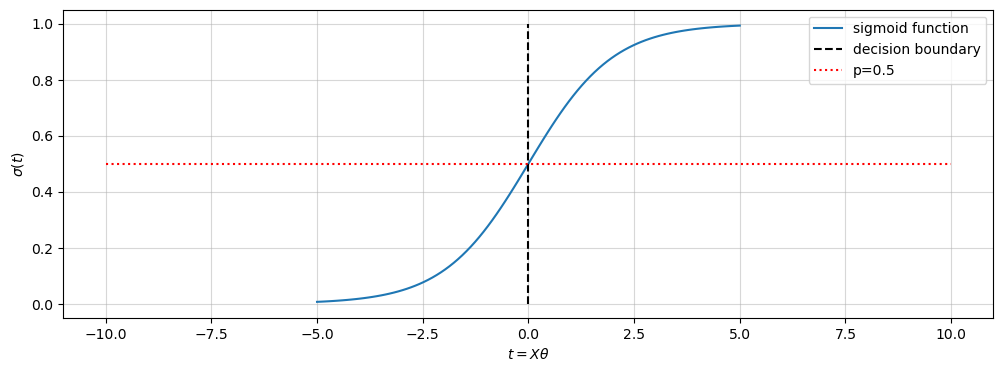

In [11]:
plt.figure(figsize=(12,4))
plt.plot(t, st, label='sigmoid function')
plt.vlines(0, 0, 1, ls='--', color='k', label='decision boundary')
plt.hlines(0.5, -10, 10, ls=':', color='r', label='p=0.5')
plt.grid(alpha=0.5)
plt.xlabel("$t = X\\theta$")
plt.ylabel("$\\sigma(t)$")
plt.legend()
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
X = np.random.random((1000,1))
y = X*3 + np.random.random((1000, 1))
y = y.ravel()

In [16]:
model.fit(X, y)

LinearRegression()

In [17]:
t = model.predict(X)

In [19]:
logit(t)[:5]

array([0.89910393, 0.80441889, 0.77333398, 0.66240006, 0.71480735])

In [21]:
p = logit(t)
y = -np.log(p)

In [22]:
p = np.linspace(0,1,10)
lg_p = -np.log(p)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4028\2843338069.py:2: RuntimeWarning: divide by zero encountered in log
  lg_p = -np.log(p)


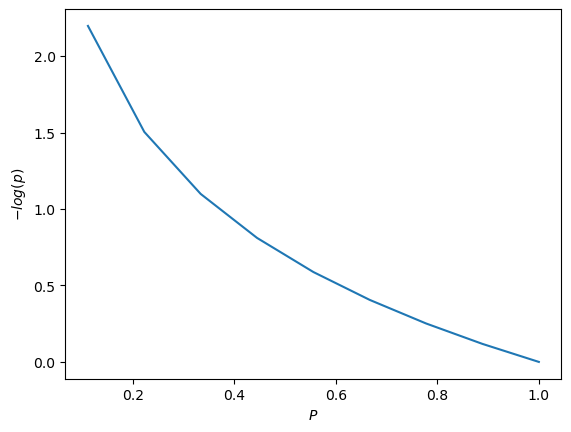

In [23]:
plt.plot(p, lg_p)
plt.xlabel("$P$")
plt.ylabel("$-log(p)$")
plt.show()

### Logistic Regression

* Prediction Function

$$
\hat y = 
\begin{cases}
1 \quad \quad if \quad \hat p >= 0.5,\\
0 \quad \quad if \quad \hat p < 0.5\\
\end{cases}
$$

* Hypothesis Function

$$ \hat p = H(\theta) = \sigma(X\theta)$$

$$\sigma(t) = \frac {1} {1 + e^{(-t)}}$$

* Cost Function

$$ J(\theta) = - \frac {1} {m} \sum_{i=0}^{m} [y^{(i)}log(\hat p^{(i)}) +
        (1-y^{(i)})log(1 - \hat p^{(i)})] $$

* Gradient Function

$$ \nabla_{\theta_{j}} J(\theta) = \frac {1}{m} \sum_{i=0}^m \sigma (X^{(i)}\theta-y{(i)}).x_j $$

In [26]:
import seaborn as sns

In [27]:
iris = sns.load_dataset('iris')

In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

In [35]:
cls = iris['species'].unique() # multinomial
cls

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Axes: xlabel='petal_length', ylabel='petal_width'>

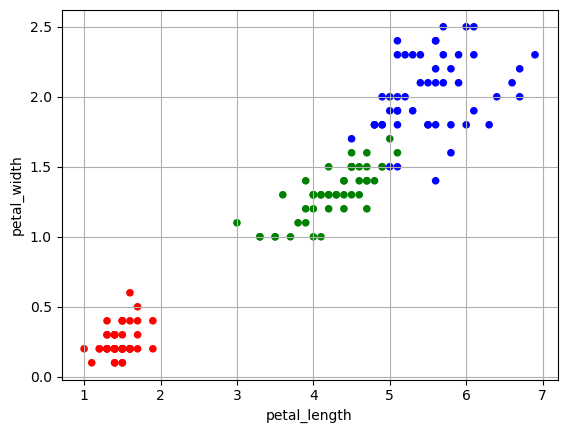

In [41]:
c = iris.species.map(dict(zip(cls, ('r', 'g', 'b'))))
iris.plot(kind='scatter', x = 'petal_length', y = 'petal_width', c = c, grid=True)


#### we want to predict whether a flower belongs to setosa or not

    1 -> setosa
    0 -> not setosa

In [40]:
y = (iris["species"] == "setosa").astype(int)

<Axes: xlabel='petal_length', ylabel='petal_width'>

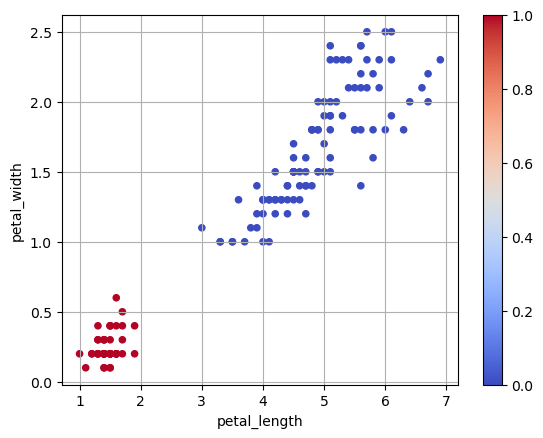

In [45]:
iris.plot(kind='scatter', x = 'petal_length', y = 'petal_width', c = y, grid=True,
          cmap='coolwarm',legend = True)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()

In [48]:
model.fit(X, y)

LogisticRegression()

In [49]:
y_hat = model.predict(X)

In [50]:
y_hat[:5]

array([1, 1, 1, 1, 1])

In [51]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int32

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y, y_hat)

array([[100,   0],
       [  0,  50]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
print(accuracy_score(y, y_hat))

1.0


In [57]:
y_hat_proba = model.predict_proba(X)

In [59]:
y_hat_proba[:5]
# 0 (negative) class , 1 (positive) class

array([[0.01592431, 0.98407569],
       [0.0226937 , 0.9773063 ],
       [0.01387116, 0.98612884],
       [0.02287792, 0.97712208],
       [0.01394659, 0.98605341]])

In [66]:
X['petal_width'].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

In [78]:
X_new = np.linspace(0, 2.5, 100).reshape(-1, 1)

In [79]:
X_train = X[['petal_width']]

In [80]:
model = LogisticRegression()
model.fit(X_train, y)
y_hat = model.predict(X_train) # Train error / accuracy
print('accuracy: ', accuracy_score(y, y_hat))
print('error: ' , confusion_matrix(y,y_hat))

accuracy:  1.0
error:  [[100   0]
 [  0  50]]


In [81]:
y_hat_proba = model.predict_proba(X_new)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [82]:
y_hat_proba[:5]

array([[0.03157545, 0.96842455],
       [0.03527138, 0.96472862],
       [0.03938233, 0.96061767],
       [0.0439506 , 0.9560494 ],
       [0.04902172, 0.95097828]])

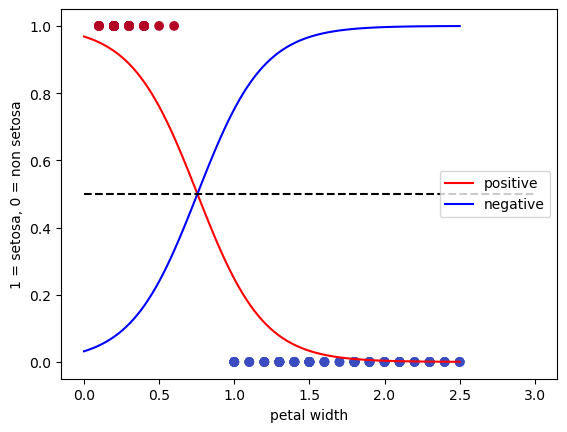

In [86]:
plt.scatter(X['petal_width'], y, c = y, cmap = 'coolwarm')
plt.xlabel('petal width')
plt.plot(X_new, y_hat_proba[:, 1],label = 'positive', color='red')
plt.plot(X_new, y_hat_proba[:, 0],label = 'negative', color='blue') 
plt.ylabel('1 = setosa, 0 = non setosa')
plt.hlines(0.5, 0, 3, color = 'k', ls = '--')
plt.legend()
plt.show()
# S-shaped curve because we are predicting using sigmoid function